In [11]:

csv_file_path = './test_scene/NX01.csv'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

def visualize(csv_file_path):
    try:
        df = pd.read_csv(csv_file_path)
        print("CSV data loaded successfully!")
        print(df.head()) # Display the first few rows to confirm
    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")
        print("Please make sure the CSV file is in the correct directory or provide the full path.")
        exit() # Exit if the file isn't found

    # --- 2. Basic Data Preprocessing (Optional but good practice) ---
    # Combine timestamp_sec and timestamp_nanosec into a single timestamp if needed for analysis
    # For plotting path, pos_x, pos_y, pos_z are sufficient.
    df['timestamp'] = df['timestamp_sec'] + df['timestamp_nanosec'] / 1e9

    # --- 3. Extract Position Data ---
    # We need the x, y, z coordinates for the 3D plot
    x_coords = df['pos_x']
    y_coords = df['pos_y']
    z_coords = df['pos_z']

    # --- 4. Create the 3D Plot ---
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the flight path
    ax.plot(x_coords, y_coords, z_coords, marker='o', linestyle='-', color='blue', label='Flight Path')

    # Plot the start point
    if not df.empty:
        ax.scatter(x_coords.iloc[0], y_coords.iloc[0], z_coords.iloc[0],
                color='green', s=100, label='Start Point', edgecolors='black')
        # Plot the end point
        ax.scatter(x_coords.iloc[-1], y_coords.iloc[-1], z_coords.iloc[-1],
                color='red', s=100, label='End Point', edgecolors='black')

    # --- 5. Customize the Plot ---
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.set_title('Agent Flight Path')
    ax.legend()
    ax.grid(True)

    # Set equal aspect ratio (important for true spatial representation)
    # This might make the plot look distorted if the range of coordinates is very different.
    # If you have large ranges, consider setting limits manually based on your expected flight area.
    max_range = np.array([x_coords.max()-x_coords.min(),
                        y_coords.max()-y_coords.min(),
                        z_coords.max()-z_coords.min()]).max() / 2.0

    mid_x = (x_coords.max()+x_coords.min()) * 0.5
    mid_y = (y_coords.max()+y_coords.min()) * 0.5
    mid_z = (z_coords.max()+z_coords.min()) * 0.5

    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)


    # --- 6. Display the Plot ---
    plt.tight_layout() # Adjusts plot to prevent labels from overlapping
    plt.show()

    # --- Optional: Visualize specific data points or time segments ---
    # You can add more plots here, e.g., velocity over time, or individual position components.

    plt.figure(figsize=(12, 4))
    plt.plot(df['timestamp'], df['pos_x'], label='X Position')
    plt.plot(df['timestamp'], df['pos_y'], label='Y Position')
    plt.plot(df['timestamp'], df['pos_z'], label='Z Position')
    plt.xlabel('Timestamp (seconds)')
    plt.ylabel('Position')
    plt.title('Position Components Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(df['timestamp'], df['vel_x'], label='X Velocity')
    plt.plot(df['timestamp'], df['vel_y'], label='Y Velocity')
    plt.plot(df['timestamp'], df['vel_z'], label='Z Velocity')
    plt.xlabel('Timestamp (seconds)')
    plt.ylabel('Velocity')
    plt.title('Velocity Components Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Quaternions are harder to plot directly. You might convert to Euler angles for visualization if needed.
    # For example, to visualize yaw:
    # from scipy.spatial.transform import Rotation as R
    # yaw_angles = []
    # for _, row in df.iterrows():
    #     r = R.from_quat([row['q_x'], row['q_y'], row['q_z'], row['q_w']])
    #     # r.as_euler('xyz', degrees=True) # or 'zyx' depending on your convention
    #     yaw_angles.append(r.as_euler('xyz')[2]) # Assuming Z is yaw, in radians
    # plt.figure(figsize=(12,4))
    # plt.plot(df['timestamp'], np.degrees(yaw_angles), label='Yaw Angle (degrees)')
    # plt.xlabel('Timestamp (seconds)')
    # plt.ylabel('Yaw (degrees)')
    # plt.title('Yaw Angle Over Time')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

CSV data loaded successfully!
   timestamp_sec  timestamp_nanosec  delta_t_sec  pos_x  pos_y  pos_z  vel_x  \
0     1748337053           41537318     0.000000    0.0    0.0    3.0    0.0   
1     1748337053           51508660     0.009971    0.0    0.0    3.0    0.0   
2     1748337053           61320685     0.009812    0.0    0.0    3.0    0.0   
3     1748337053           70850886     0.009530    0.0    0.0    3.0    0.0   
4     1748337053           80967267     0.010116    0.0    0.0    3.0    0.0   

   vel_y  vel_z  q_x  q_y  q_z  q_w  
0    0.0    0.0  1.0  NaN  NaN  NaN  
1    0.0    0.0  1.0  NaN  NaN  NaN  
2    0.0    0.0  1.0  NaN  NaN  NaN  
3    0.0    0.0  1.0  NaN  NaN  NaN  
4    0.0    0.0  1.0  NaN  NaN  NaN  


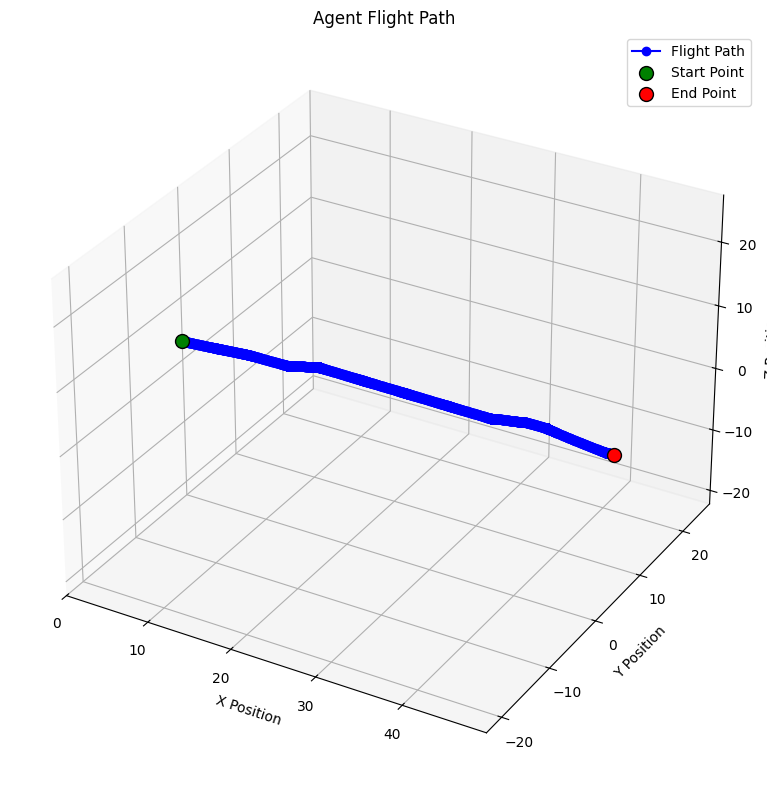

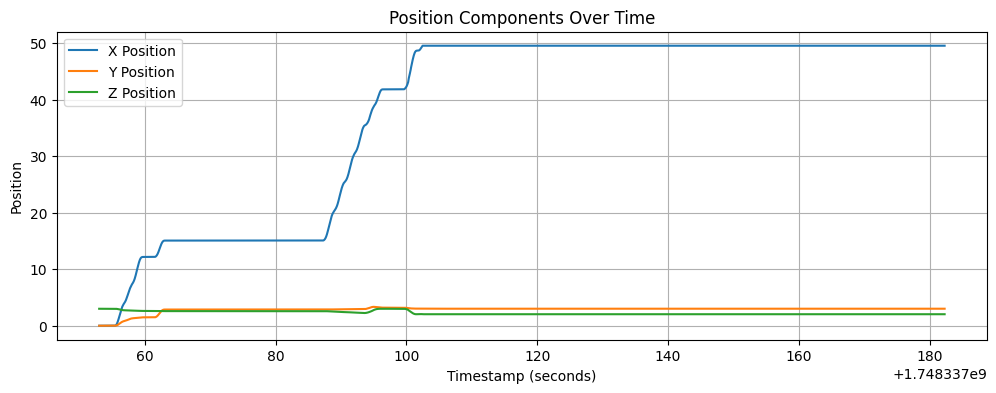

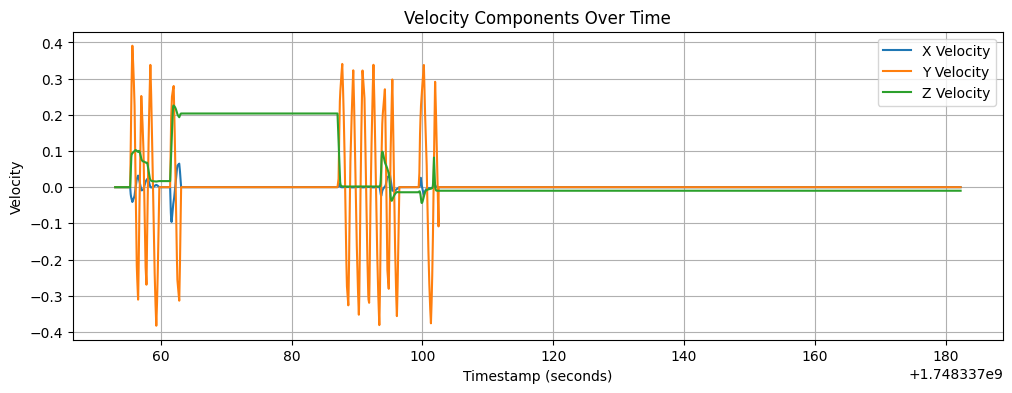

In [13]:
visualize(csv_file_path)

CSV data loaded successfully!
   timestamp_sec  timestamp_nanosec  delta_t_sec  pos_x  pos_y  pos_z  vel_x  \
0     1748337053          150052849     0.000000    0.0    3.0    3.0    0.0   
1     1748337053          159898338     0.009845    0.0    3.0    3.0    0.0   
2     1748337053          170364278     0.010466    0.0    3.0    3.0    0.0   
3     1748337053          179711390     0.009347    0.0    3.0    3.0    0.0   
4     1748337053          189701995     0.009991    0.0    3.0    3.0    0.0   

   vel_y  vel_z  q_x  q_y  q_z  q_w  
0    0.0    0.0  1.0  NaN  NaN  NaN  
1    0.0    0.0  1.0  NaN  NaN  NaN  
2    0.0    0.0  1.0  NaN  NaN  NaN  
3    0.0    0.0  1.0  NaN  NaN  NaN  
4    0.0    0.0  1.0  NaN  NaN  NaN  


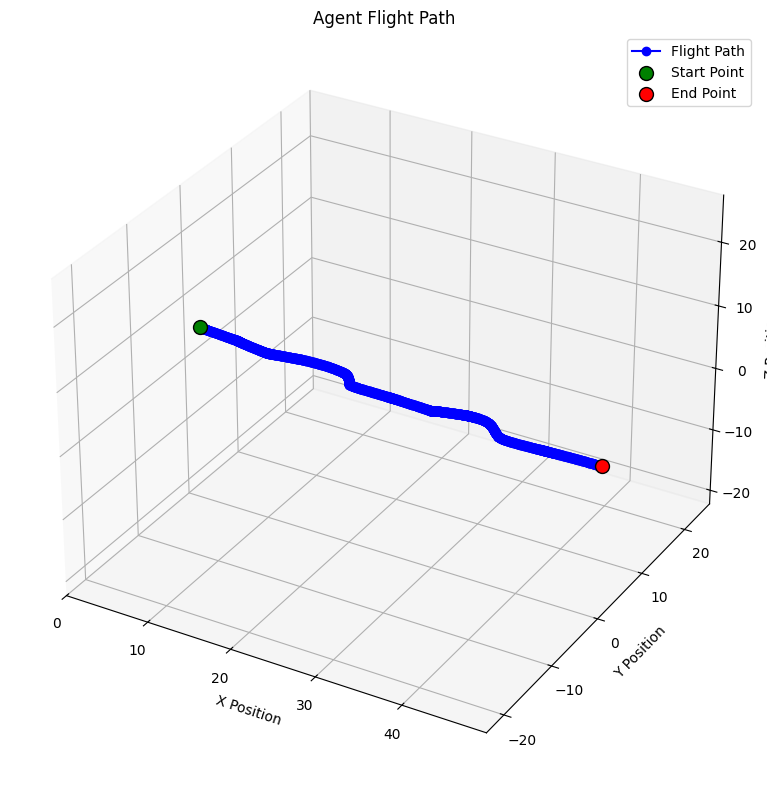

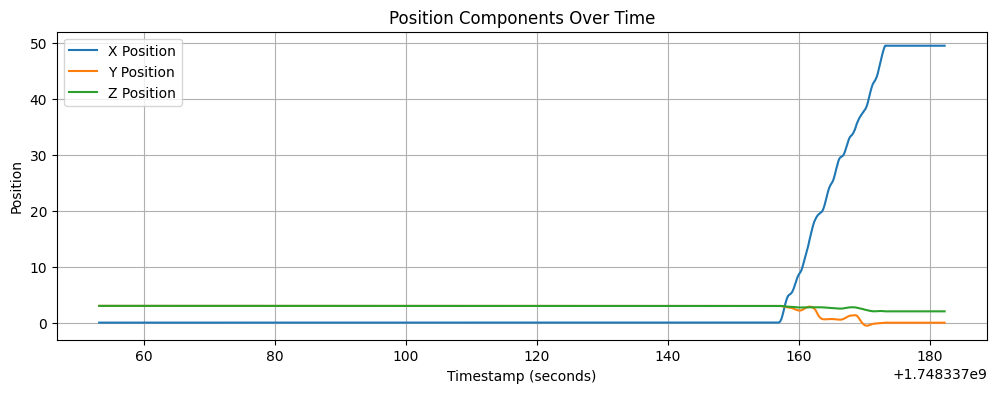

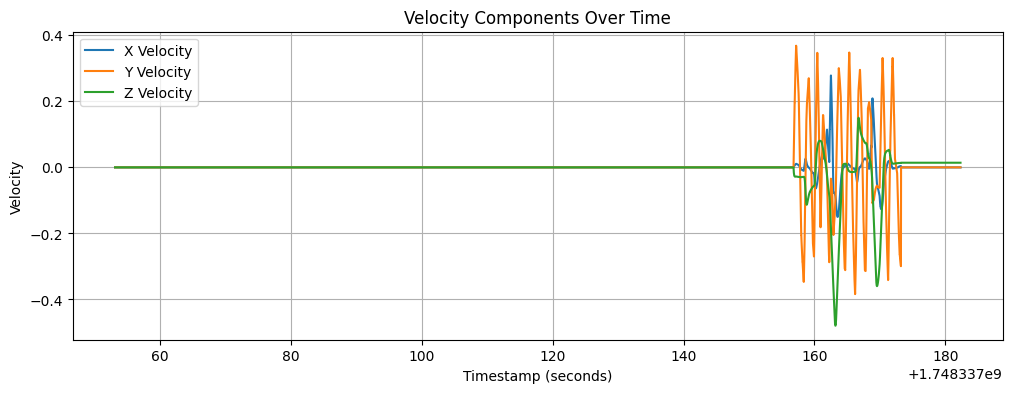

In [14]:
visualize(csv_file_path='./test_scene/NX02.csv')

In [16]:
def visualize_multiple_paths(csv_file_paths):
    """
    Visualizes multiple agent flight paths from an array of CSV files on a single 3D plot.

    Args:
        csv_file_paths (list): A list of strings, where each string is the path to a CSV file.
                                Each CSV file is expected to have 'pos_x', 'pos_y', 'pos_z' columns.
    """
    if not isinstance(csv_file_paths, list):
        print("Error: csv_file_paths must be a list of file paths.")
        return

    if not csv_file_paths:
        print("No CSV files provided for visualization.")
        return

    # --- 1. Initialize Plot ---
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # To calculate overall limits for consistent aspect ratio
    all_x_coords = []
    all_y_coords = []
    all_z_coords = []

    # Define a list of colors for different paths (you can expand this if you have many agents)
    colors = plt.cm.get_cmap('tab10', len(csv_file_paths)) # Using a colormap for distinct colors

    # --- 2. Load and Plot Each CSV ---
    for i, csv_path in enumerate(csv_file_paths):
        try:
            df = pd.read_csv(csv_path)
            print(f"CSV data loaded successfully from: {csv_path}")
            # print(df.head()) # Uncomment to see head of each file

            # Combine timestamp_sec and timestamp_nanosec if needed for other analyses
            # df['timestamp'] = df['timestamp_sec'] + df['timestamp_nanosec'] / 1e9

            # Extract Position Data
            x_coords = df['pos_x']
            y_coords = df['pos_y']
            z_coords = df['pos_z']

            # Append to overall lists for limit calculation
            all_x_coords.extend(x_coords.tolist())
            all_y_coords.extend(y_coords.tolist())
            all_z_coords.extend(z_coords.tolist())

            # Determine a label for the plot
            # Extract filename without extension for the label
            label = os.path.basename(csv_path).replace('.csv', '')

            # Plot the flight path for the current agent
            ax.plot(x_coords, y_coords, z_coords,
                    marker='o', markersize=3, linestyle='-',
                    color=colors(i), label=f'Path: {label}')

            # Plot start and end points for the current agent
            if not df.empty:
                ax.scatter(x_coords.iloc[0], y_coords.iloc[0], z_coords.iloc[0],
                           color=colors(i), s=100, marker='^', edgecolors='black',
                           label=f'Start: {label}' if i == 0 else "") # Label start only once
                ax.scatter(x_coords.iloc[-1], y_coords.iloc[-1], z_coords.iloc[-1],
                           color=colors(i), s=100, marker='x', edgecolors='black',
                           label=f'End: {label}' if i == 0 else "") # Label end only once

        except FileNotFoundError:
            print(f"Error: The file '{csv_path}' was not found. Skipping this file.")
        except KeyError as e:
            print(f"Error: Missing expected column in {csv_path}: {e}. Skipping this file.")
        except Exception as e:
            print(f"An unexpected error occurred while processing {csv_path}: {e}. Skipping this file.")

    # --- 3. Customize the Overall Plot ---
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.set_title('Multiple Agent Flight Paths')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
    ax.grid(True)

    # Set equal aspect ratio for the entire scene
    if all_x_coords and all_y_coords and all_z_coords: # Ensure lists are not empty
        min_x, max_x = np.min(all_x_coords), np.max(all_x_coords)
        min_y, max_y = np.min(all_y_coords), np.max(all_y_coords)
        min_z, max_z = np.min(all_z_coords), np.max(all_z_coords)

        max_range = np.array([max_x - min_x, max_y - min_y, max_z - min_z]).max() / 2.0

        mid_x = (max_x + min_x) * 0.5
        mid_y = (max_y + min_y) * 0.5
        mid_z = (max_z + min_z) * 0.5

        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)
    else:
        print("No valid data found to set plot limits.")

    # --- 4. Display the Plot ---
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
    plt.show()


CSV data loaded successfully from: ./test_scene/NX01.csv
CSV data loaded successfully from: ./test_scene/NX02.csv


/tmp/ipykernel_1222/3460486751.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(csv_file_paths)) # Using a colormap for distinct colors
/tmp/ipykernel_1222/3460486751.py:63: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_coords.iloc[-1], y_coords.iloc[-1], z_coords.iloc[-1],
/tmp/ipykernel_1222/3460486751.py:63: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_coords.iloc[-1], y_coords.iloc[-1], z_coords.iloc[-1],


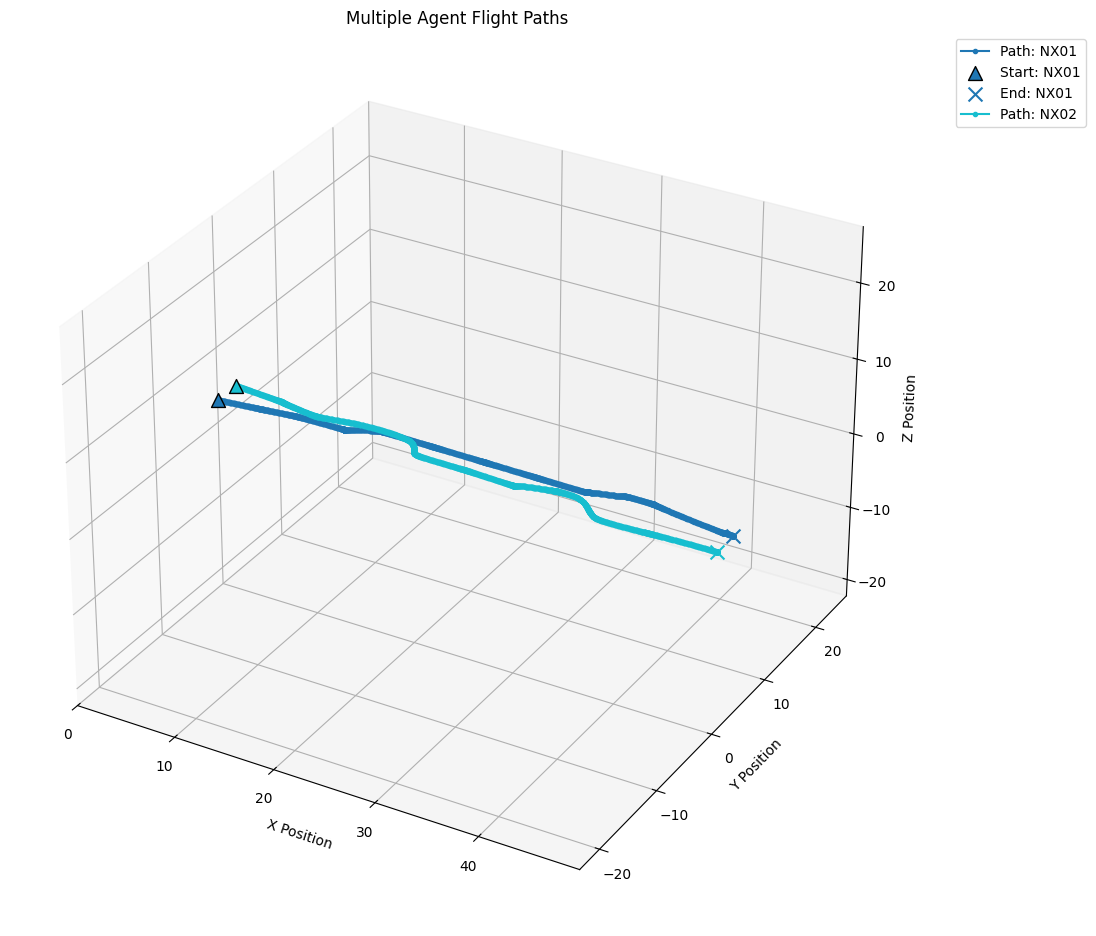

In [17]:
visualize_multiple_paths(['./test_scene/NX01.csv', './test_scene/NX02.csv'])

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
class Scene:
    """
    Class that describes a scene, which can be further broken down into the states, or flight paths taken by an arbitrary number of agents. Takes in the scene directory which
    contains csvs of the flight paths of multiple agents and transforms them into numpy arrays that can be manipulated during training or evaluation. Supports visualization, saving
    of visualization, creating of new scenes and saving as csvs.
    """
    def __init__(self, scene_path=None, states=None, position_threshold=1e-8):
        self.scene_path = scene_path
        self.states = states
        self.position_threshold = position_threshold
        self.sorted_agent_ids = None
        self.agent_paths = {}

        if self.states is not None:
            print(f"States were provided, initializing scene from provided states of shape {self.states.shape}")
        else:
            print(f"Initializing scene using states in {self.scene_path}")
            if self.scene_path is not None:
                if not os.path.isdir(scene_path):
                    raise FileNotFoundError(f"Scene path {scene_path} does not exist!")
                
                for file in os.listdir(scene_path):
                    if file.endswith(".csv"):
                        file_path = os.path.join(scene_path, file)
                        print(f"Found {file_path}, processing...")

                        # Get agent ID by removing file extension
                        agent_id = os.path.splitext(file)[0]
                        self._process_agent_csv(file_path, agent_id)

                # Make sure all paths are of the same length
                self._pad_agent_paths()
            else:
                raise ValueError("Provide either a 'scene_path' or 'states' for Scene initialization")
    
    def _process_agent_csv(self, file_path, agent_id):
        """
        Read agent csv, remove hovering states and stores it.
        """
        df = pd.read_csv(file_path)

        # Check that expected columns exist
        expected_columns = ['pos_x', 'pos_y', 'pos_z', 'vel_x', 'vel_y', 'vel_z', 'q_x', 'q_y', 'q_z', 'q_w']
        if not all(col in df.columns for col in expected_columns):
            raise ValueError(f"CSV file {file_path} is missing expected columns! Check that states are 10")
        
        processed_states = []

        data = df[expected_columns].values

        if len(data) == 0:
            print(f"Warning: {file_path} is empty. Skipping...")
            self.agent_paths[agent_id] = np.array([])
            return
        
        processed_states.append(data[0])

        for i in range (1, len(data)):
            # Extract and compare positional data. If the ith + 1 state and ith state are similar we remove the ith state
            prev_pos = data[i-1, :3]
            current_pos = data[i, :3]

            distance = np.linalg.norm(current_pos - prev_pos)

            if distance > self.position_threshold:
                processed_states.append(data[i])
        
        self.agent_paths[agent_id] = np.array(processed_states)
        print(f"Processed {agent_id}, kept {len(self.agent_paths[agent_id])} states after removing hover states from original {len(data)}")

    def _pad_agent_paths(self):
        """
        Pads individual agent paths to maximum length and combines them to yield a TxNxS array
        T is timestep, N is the number of agents and S is the state space
        """
        if not self.agent_paths:
            self.states = np.array([])
            print("No agent paths to pad.")
            return

        max_timesteps = 0
        for agent_id, path in self.agent_paths.items():
            if len(path) > max_timesteps:
                max_timesteps = len(path)

        if max_timesteps == 0:
            self.states = np.array([])
            print("All agent paths are empty. No states to form.")
            return
        
        num_agents = len(self.agent_paths)
        state_dim = 10

        # Initialize states array with zeroes
        self.states = np.zeros((max_timesteps, num_agents, state_dim))

        # Ensure consistent agent order, so 0th is NX01 and so on
        sorted_agent_ids = sorted(self.agent_paths.keys())
        self.sorted_agent_ids = sorted_agent_ids
        for i, agent_id in enumerate(sorted_agent_ids):
            path = self.agent_paths[agent_id]

            if len(path) == 0:
                print(f"Warning: Agent {agent_id} has an empty path after processing. It will be padded entirely.")
                # If path is empty, we can just fill with zeros or a neutral state if one exists
                # For now, it will remain zeros from the initialization
                continue

            # Fill in states
            self.states[:len(path), i, :] = path

            # Pad by repeating the last entry
            if len(path) < max_timesteps:
                last_entry = path[-1]
                self.states[len(path):max_timesteps, i, :] = last_entry
                print(f"Padded agent {agent_id} from {len(path)} to {max_timesteps} timesteps.")
        
        print(f"Final scene states shape: {self.states.shape} (TxNxS)")

    def save_scene_as_csvs(self, output_dir="new_scene_data"):
        """
        Saves the processed and padded scene data back into individual CSV files
        in a new directory, mimicking the original input format.
        """
        if self.states is None or self.states.size == 0:
            print("No states to save. Scene is empty or not initialized.")
            return

        os.makedirs(output_dir, exist_ok=True)
        print(f"Saving processed scene to {output_dir}")

        T, N, S = self.states.shape
        headers = ['pos_x', 'pos_y', 'pos_z', 'vel_x', 'vel_y', 'vel_z', 'q_x', 'q_y', 'q_z', 'q_w']
        if self.sorted_agent_ids is not None:
            for i, agent_id in enumerate(self.sorted_agent_ids):
                agent_data = self.states[:, i, :]
                df = pd.DataFrame(agent_data, columns=headers)
                # Save as "NX01.csv" and so on
                filename = f"{agent_id}.csv"
                output_file_path = os.path.join(output_dir, filename)
                df.to_csv(output_file_path, index=False)
                print(f"Saved {output_file_path}")
        else: 
            for i in range(N):
                agent_data = self.states[:, i, :]
                df = pd.DataFrame(agent_data, columns=headers)
                # Assuming original filenames were like NX01.csv, NX02.csv
                filename = f"NX{(i+1):02d}.csv" 
                output_file_path = os.path.join(output_dir, filename)
                df.to_csv(output_file_path, index=False)
                print(f"Saved {output_file_path}")

    def visualize_scene(self, output_path=None, show_plot=True):
        """
        Visualizes the 3D flight paths of all agents in the scene.
        Optionally saves the plot to a specified output path.
        """
        if self.states is None or self.states.size == 0:
            print("No states to visualize. Scene is empty or not initialized.")
            return

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        T, N, S = self.states.shape

        for i in range(N):
            # Extract position data for the i-th agent (first 3 columns of the state vector)
            agent_positions = self.states[:, i, :3]
            ax.plot(agent_positions[:, 0], agent_positions[:, 1], agent_positions[:, 2], label=f'Agent {i+1}')
            ax.scatter(agent_positions[0, 0], agent_positions[0, 1], agent_positions[0, 2], marker='o', s=50, color='green', label=f'Agent {i+1} Start' if i == 0 else "")
            ax.scatter(agent_positions[-1, 0], agent_positions[-1, 1], agent_positions[-1, 2], marker='x', s=50, color='red', label=f'Agent {i+1} End' if i == 0 else "")


        ax.set_xlabel('pos_x')
        ax.set_ylabel('pos_y')
        ax.set_zlabel('pos_z')
        ax.set_title('Multi-Agent Flight Paths')
        ax.legend()
        ax.grid(True)

        if output_path:
            plt.savefig(output_path)
            print(f"Scene visualization saved to {output_path}")
        
        if show_plot:
            plt.show()
        else:
            plt.close(fig) # Close the figure if not showing to free up memory
    
    def get_timestamps(self):
        if self.states is not None:
            return self.states.shape[0]
        else:
            raise ValueError(f"States is not initialized yet!")
    
    def get_state(self, timestep):
        if self.states is not None:
            return self.states[timestep]
        else:
            raise ValueError(f"States is not initialized yet!")
    
    def get_states(self):
        if self.states is not None:
            return self.states
        else:
            raise ValueError(f"States is not initialized yet!")
    

In [2]:
import torch
from torch.utils.data import Dataset
class SceneDataset(Dataset):
    def __init__(self, scene_paths):
        """
        Initialize the dataset by loading and processing multiple scenes.
        Each scene would be 1 training example
        Args:
            scene_paths: A list of directories, each containing CSVs for one scene
        """
        self.scenes = []
        for path in scene_paths:
            # Load each scene using Scene class
            scene = Scene(path)

            # Get full state trajectory (T, N, S)
            full_states_np = scene.get_states()

            # Convert to Tensor
            full_states_tensor = torch.tensor(full_states_np, dtype=torch.float32)

            self.scenes.append(full_states_tensor)
        
        self.num_scenes = len(self.scenes)
    
    # Necessary overriding of Dataset functions
    def __len__(self):
        """
        Return total number of scenes.
        """
        return self.num_scenes
    
    def __getitem__(self, idx):
        """
        Retrieves trajectory data for a single scene
        """
        return self.scenes[idx]


In [77]:
test_scene = Scene("./six_agents_forest3_twenty_4")

Initializing scene using states in ./six_agents_forest3_twenty_4
Found ./six_agents_forest3_twenty_4/NX04.csv, processing...
Processed NX04, kept 426 states after removing hover states from original 1508
Found ./six_agents_forest3_twenty_4/NX02.csv, processing...
Processed NX02, kept 506 states after removing hover states from original 1515
Found ./six_agents_forest3_twenty_4/NX03.csv, processing...
Processed NX03, kept 386 states after removing hover states from original 1522
Found ./six_agents_forest3_twenty_4/NX06.csv, processing...
Processed NX06, kept 303 states after removing hover states from original 1511
Found ./six_agents_forest3_twenty_4/NX05.csv, processing...
Processed NX05, kept 383 states after removing hover states from original 1515
Found ./six_agents_forest3_twenty_4/NX01.csv, processing...
Processed NX01, kept 227 states after removing hover states from original 1511
Padded agent NX01 from 227 to 506 timesteps.
Padded agent NX03 from 386 to 506 timesteps.
Padded agen

In [78]:
test_scene.get_timestamps()
test_scene.get_state(0)
test_scene.get_states().shape
test_scene.get_state(-1)

array([[-1.3618740e+01,  2.2529570e+00,  2.0000000e+00,  1.0490850e+00,
         4.2161000e-01,  0.0000000e+00,  1.6355000e-01, -2.4452800e-01,
        -1.9678200e-01,  9.3527200e-01],
       [-1.4778852e+01,  5.8280790e+00,  2.0001090e+00,  1.0080730e+00,
        -1.4399860e+00, -1.0230000e-03, -3.8105400e-01, -7.0730000e-02,
         3.8197300e-01,  8.3898300e-01],
       [-1.2872488e+01,  3.0900330e+00,  2.0160420e+00,  1.4697430e+00,
        -6.9445400e-01, -1.4559600e-01, -2.6843000e-01,  1.9360100e-01,
         9.3704900e-01, -1.1137000e-01],
       [-1.1437877e+01,  2.8617000e+00,  2.0000320e+00,  9.8649800e-01,
        -1.6427600e+00, -2.7900000e-04, -4.0431300e-01, -8.0776000e-02,
         3.0691800e-01,  8.5779200e-01],
       [-1.5843906e+01,  5.8500910e+00,  2.0924990e+00, -1.3963470e+00,
         3.1060000e-03, -5.5345500e-01, -1.6811900e-01,  1.3450300e-01,
        -7.6389400e-01,  6.0836800e-01],
       [-1.3959208e+01,  6.8656270e+00,  2.0000030e+00, -1.2841600e-01,
   

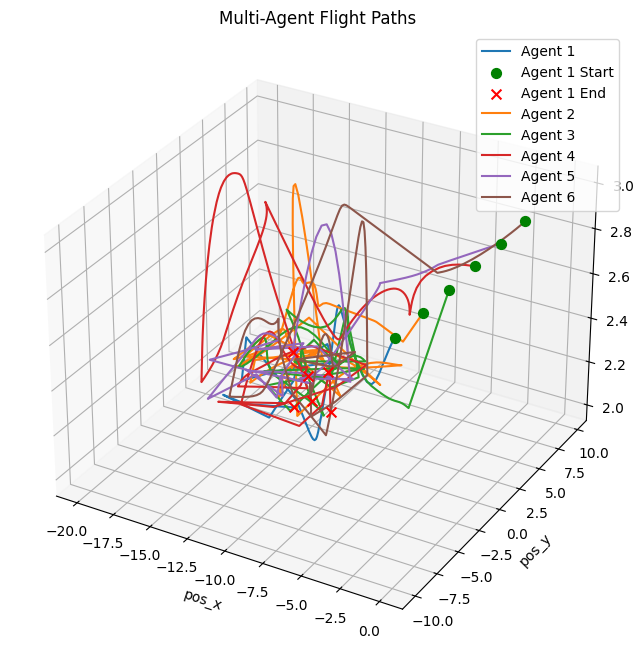

In [79]:
test_scene.visualize_scene()

In [30]:
test_scene.visualize_scene("./six_agents_forest3_twenty_4", False)

Scene visualization saved to ./six_agents_forest3_twenty_4


In [8]:
test_scene.save_scene_as_csvs("./three_agents_obs_track_easy_forest_0_processed")

Saving processed scene to ./three_agents_obs_track_easy_forest_0_processed
Saved ./three_agents_obs_track_easy_forest_0_processed/NX01.csv
Saved ./three_agents_obs_track_easy_forest_0_processed/NX02.csv
Saved ./three_agents_obs_track_easy_forest_0_processed/NX03.csv


CSV data loaded successfully from: ./test_scene_processed/NX01.csv
CSV data loaded successfully from: ./test_scene_processed/NX02.csv


/tmp/ipykernel_1222/3460486751.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(csv_file_paths)) # Using a colormap for distinct colors
/tmp/ipykernel_1222/3460486751.py:63: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_coords.iloc[-1], y_coords.iloc[-1], z_coords.iloc[-1],
/tmp/ipykernel_1222/3460486751.py:63: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_coords.iloc[-1], y_coords.iloc[-1], z_coords.iloc[-1],


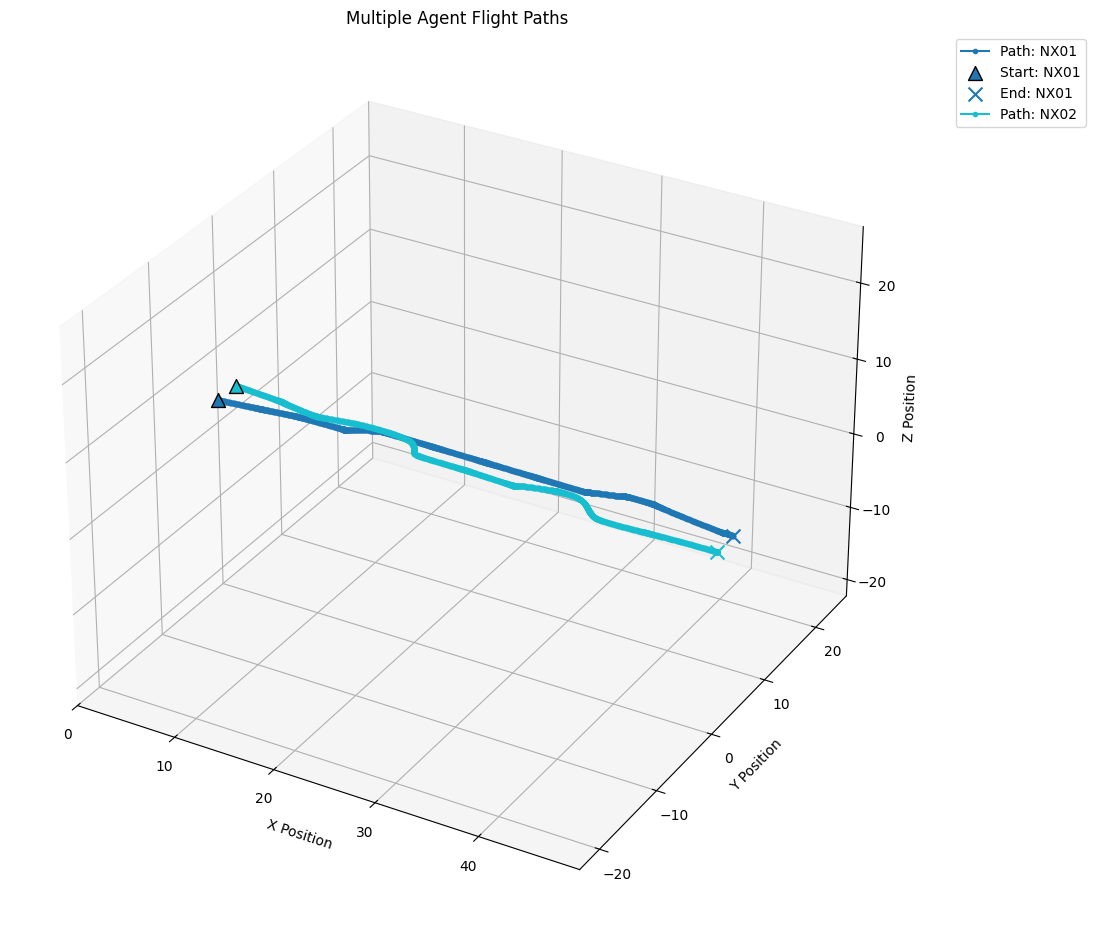

In [22]:
visualize_multiple_paths(['./test_scene_processed/NX01.csv', './test_scene_processed/NX02.csv'])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

TIME = 0.01

def quadrotor_controller_pytorch(s, s_ref):
    """
    Dummy controller. 
    u_ref = controller(s, s_ref)
    dsdt = dynamics(s, u)
    s_next = s + dsdt * TIME
    The sim controller just updates the next state to be the goal state.
    """
    # We try simple subtraction first, concern is quaternion. But if just numbers maybe it works out.
    return (s_ref - s) / TIME

class NetworkAction(nn.Module):
    """
    Controller as a neural network, rewritten in PyTorch. We overlook the top_k variable for now
    since our simulation will be ran on 2 agents.
    Args:
        state_dim (int): Dimension of the state vector (e.g., 10).
        ref_state_dim (int): Dimension of the reference state vector (e.g., 10).
        output_action_dim (int): Dimension of the control action (e.g., 2 or 3). In our case, 10
        obs_radius (float): The observation radius.
    """
    def __init__(self, state_dim=10, ref_state_dim=10, output_action_dim=10, obs_radius=1.0):
        super(NetworkAction, self).__init__()
        self.obs_radius = obs_radius
        self.state_dim = state_dim
        self.ref_state_dim = ref_state_dim
        self.output_action_dim = output_action_dim

        # The input channel has an additional identity field
        self.conv1_in_channels = state_dim + 1

        # 1D convolutions
        self.conv1 = nn.Conv1d(in_channels=self.conv1_in_channels, out_channels=64, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1)

        # Fully connected layers
        self.fc1_in_features = 128 + state_dim
        self.fc1 = nn.Linear(in_features=self.fc1_in_features, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=output_action_dim)
    
    def forward(self, s, s_ref):
        """
        The forward pass of the model. Yields control input u.
        Args:
            s (N, S_dim): The current state of N agents.
            s_ref (N, S_dim): The reference location, velocity and acceleration.
        Returns:
            u (N, output_action_dim): The control action.
        """
        s = torch.tensor(s, dtype=torch.float32)
        s_ref = torch.tensor(s_ref, dtype=torch.float32)
        # x: (N, N, S_dim) representing s_i - s_j (state difference across agents)
        print(f"Input dimensions: {s.shape}")
        x = s.unsqueeze(1) - s.unsqueeze(0)
        print(f"x dimensions after subtraction: {x.shape}")
        
        # Add identity matrix as means of self-identification. unsqueeze adds extra dimenion
        identity_matrix = torch.eye(x.shape[0], device=s.device, dtype=s.dtype).unsqueeze(2)
        x = torch.cat([x, identity_matrix], dim=2)
        print(f"x dimensions after concatenation with identity: {x.shape}")

        # Define observation mask
        dist = torch.linalg.norm(x[:, :, :3], dim=2, keepdim=True)
        mask = (dist < self.obs_radius).float()
        print(f"mask dimensions: {mask.shape}")

        # Permute because Conv1D expects (batch_size, channels, sequence_length)
        # permute from (N, N, features) to (N, features, N)
        x_conv_in = x.permute(0, 2, 1)
        print(f"x_conv input shape: {x_conv_in.shape}")

        x = F.relu(self.conv1(x_conv_in)) # x becomes (N, 64, N)
        x = F.relu(self.conv2(x)) # x: (N, 128, N)
        print(f"x_conv output shape: {x.shape}")

        # Permute the mask to be (N, 1, N) to be multiplied with x
        mask_conv_out = mask.permute(0, 2, 1)

        # Element-wise multiplication
        x_masked = x * mask_conv_out
        print(f"x shape after masking: {x_masked.shape}")
        
        # Maxpooling along the "K" dimension
        x = torch.max(x_masked, dim=2)[0]
        # Should be (N, 128)
        print(f"x shape after pooling: {x.shape}")

        # Concatentate with s_ref
        x = torch.cat([x, s - s_ref], dim=1)
        print(f"x shape after concatenation with state differences: {x.shape}")

        # Put x through fully connected layers
        x = F.relu(self.fc1(x)) # x: (N, 64)
        x = F.relu(self.fc2(x)) # x: (N, 128)
        x = F.relu(self.fc3(x)) # x: (N, 64)
        x = self.fc4(x) # x: (N, output_action_dim) - no activation on final layer
        print(x)

        # Reference controller action
        # u_ref = controller(s, s_ref)
        # dsdt = dynamics(s, u)
        # s_next = s + dsdt * TIME
        # But for us, we have no dynamics
        u_ref = quadrotor_controller_pytorch(s, s_ref)
        u = x + u_ref
        return u

In [69]:
first = test_scene.get_state(0)
second = test_scene.get_state(1)
second - first

array([[ 5.0000e-06,  1.0000e-06,  0.0000e+00, -2.9010e-03,  1.4258e-02,
         4.9990e-03, -1.1800e-04,         nan,         nan,         nan],
       [ 4.0000e-06,  0.0000e+00,  0.0000e+00,  6.3200e-04,  1.1477e-02,
        -4.4590e-03, -7.6000e-05,         nan,         nan,         nan]])

In [70]:
u_ref = quadrotor_controller_pytorch(first, second)
next = first + u_ref * TIME
next, second
# should be good enough
u_ref.shape

(2, 10)

In [71]:
model = NetworkAction()

In [72]:
u = model(first, second)

Input dimensions: torch.Size([2, 10])
x dimensions after subtraction: torch.Size([2, 2, 10])
x dimensions after concatenation with identity: torch.Size([2, 2, 11])
mask dimensions: torch.Size([2, 2, 1])
x_conv input shape: torch.Size([2, 11, 2])
x_conv output shape: torch.Size([2, 128, 2])
x shape after masking: torch.Size([2, 128, 2])
x shape after pooling: torch.Size([2, 128])
x shape after concatenation with state differences: torch.Size([2, 138])
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<AddmmBackward0>)


In [73]:
u

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<AddBackward0>)

In [74]:
class NetworkCBF(nn.Module):
    """
    Control barrier function as a neural network, written in PyTorch.
    Calculates a scalar CBF value 'h' for each agent with respect to its neighbors
    Similarly, we ignore the notion of nearest agents for now
    Args:
        state_dim (int): Dimension of the state vector (e.g., 10).
        ref_state_dim (int): Dimension of the reference state vector (e.g., 10).
        obs_radius (float): The observation radius.
    """
    def __init__(self, state_diff_dim=10, dangerous_radius=1.0, obs_radius=1.0):
        super(NetworkCBF, self).__init__()

        self.dangerous_radius = dangerous_radius
        self.obs_radius = obs_radius

        # State differences(10), identity(1), signed distance(1)
        self.conv1_in_channels = state_diff_dim + 1 + 1

        # Need to permute input later to work with Conv1D
        self.conv1 = nn.Conv1d(in_channels=self.conv1_in_channels, out_channels=64, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=1)
        self.conv4 = nn.Conv1d(in_channels=64, out_channels=1, kernel_size=1)

    def forward(self, x, r):
        """
        Args:
            x: (N, N, 10) state difference of N agents
            r: radius of dangerous zone
        Returns:
            h: (N, N, 1) CBF of N agents with neighboring agents
            mask: (N, N, 1) Mask of agents within observation radius
        """
        # Make r a tensor for easier manipulation
        if not isinstance(r, torch.Tensor):
            r = torch.Tensor(r, dtype=x.dtype, device=x.device)
        
        # Calculate Euclidean distance
        d_norm = torch.sqrt(torch.sum(torch.square(x[:, :, :3]) + 1e-4, dim=2, keepdim=True)) # (N, N, 1)

        # Create identity matrix
        N_agents = x.shape[0]
        identity_matrix = torch.eye(N_agents, device=x.device, dtype=x.dtype).unsqueeze(2) # (N, N, 1)

        # Signed distance to dangerous zone
        signed_dist_to_r = d_norm - r

        # Concatenate features
        x = torch.cat([x, identity_matrix, signed_dist_to_r], dim=2) # (N, N, 12)

        # Calculate 2D distance for observation mask
        dist_2d = torch.sqrt(torch.sum(torch.square(x[:, :, :2]) + 1e-4, dim=2, keepdim=True)) # (N, N, 1)

        # Create mask based on observation radius
        mask = (dist_2d <= self.obs_radius).float() # (N, N, 1)

        # Permuate for Conv1D
        x_conv_in = x.permute(0, 2, 1) # (N, 12, N)

        x = F.relu(self.conv1(x_conv_in)) # (N, 64, N)
        x = F.relu(self.conv2(x)) # (N, 128, N)
        x = F.relu(self.conv3(x)) # (N, 64, N)
        h_raw = self.conv4(x) # (N, 1, N)

        # Permute back
        h_raw = h_raw.permute(0, 2, 1)

        # Apply mask to CBF output
        h = h_raw * mask

        return h, mask

In [ ]:
def compute_safe_mask_pytorch(s, r):
    """
    Identify agents outside the safe radius (or self-connection).
    Args:
        s (torch.Tensor): The current state of N agents (N, S).
        r (float): The safe radius.

    Returns:
        torch.Tensor: A boolean mask (N, N) where True indicates
                      either outside the safe radius or a self-connection.
    """
    N, S_dim = s.shape

    # Calculate state difference between agents
    s_diff = s.unsqueeze(1) - s.unsqueeze(0) # (N, N, S)

    # Create an identity matrix (N, N) for self-connection indication.
    eye_indicator = torch.eye(N, device=s.device, dtype=s.dtype).unsqueeze(-1) # (N, N, 1)

    # Concatenate the identity indicator to the last dimension of s_diff.
    s_diff_with_eye = torch.cat([s_diff, eye_indicator], dim=-1)

    # Extract positional difference (first 3 dimensions) and the eye indicator.
    z_diff = s_diff_with_eye[:, :, :3] # Shape: (N, N, 3)
    eye = s_diff_with_eye[:, :, -1:]  # Shape: (N, N, 1)

    # Calculate Euclidean norm (distance) for positional difference.
    dist_3d = torch.linalg.norm(z_diff + 1e-4, dim=-1, keepdim=True) # Shape: (N, N, 1)

    # Logic: Mask is True if (distance > safe_radius) OR (it's a self-connection)
    mask = torch.logical_or(dist_3d > r, eye == 1) # (N, N, 1) boolean

    return mask.squeeze(-1) # Shape: (N, N) boolean

In [ ]:
def compute_dangerous_mask_pytorch(s, r):
    """
    Identify agents within the dangerous radius
    Args:
        s (torch.Tensor): The current state of N agents (N, S).
        r (float): The danger radius.

    Returns:
        torch.Tensor: A boolean mask (N, N) where True indicates an agent in the dangerous radius
    """
    N, S_dim = s.shape

    # Calculate state difference between agents
    s_diff = s.unsqueeze(1) - s.unsqueeze(0) # (N, N, S)

    # Create an identity matrix (N, N) for self-connection indication.
    eye_indicator = torch.eye(N, device=s.device, dtype=s.dtype).unsqueeze(-1) # (N, N, 1)

    # Concatenate the identity indicator to the last dimension of s_diff.
    s_diff_with_eye = torch.cat([s_diff, eye_indicator], dim=-1)

    # Extract positional difference (first 3 dimensions) and the eye indicator.
    z_diff = s_diff_with_eye[:, :, :3] # Shape: (N, N, 3)
    eye = s_diff_with_eye[:, :, -1:]  # Shape: (N, N, 1)

    # Calculate Euclidean norm (distance) for positional difference.
    dist_3d = torch.linalg.norm(z_diff + 1e-4, dim=-1, keepdim=True) # Shape: (N, N, 1)

    # Logic: Mask is True if (distance < safe_radius) AND (it's a NOT self-connection)
    mask = torch.logical_and(dist_3d < r, eye == 0) # (N, N, 1) boolean

    return mask.squeeze(-1) # (N, N) boolean

In [ ]:
def loss_actions_pytorch(s, u, s_ref):
    """
    Loss function for the action neural network
    Args:
        s: (N, S) Current state of N agents
        s_ref: (N, S) Reference state of N agents
        u: (N, S) Control input from network
    """
    # Calculate reference control
    u_ref = quadrotor_controller_pytorch(s, s_ref)

    # Calculate deviation
    error = u - u_ref

    # Huber loss per element
    loss_val_per_element = torch.where(torch.abs(error) < 1.0, # If absolute error is less than 1.0
                                   torch.abs(error),       # Use absolute error
                                   error**2)               # Else, use squared error
    
    # Sum over the action dimensions (S_dim) to get loss per agent
    loss_per_agent_dim = loss_val_per_element.sum(dim=-1) # (N,)
    
    # Compute safe mask considering all drones (N, N) boolean representing safe or self
    raw_safe_mask = compute_safe_mask_pytorch(s, 1.0)

    # Calculates, for each agent, the proportion of all other agents (and itself) that it is safe with
    safe_proportion_per_agent = raw_safe_mask.float().mean(dim=1) # (N,)

    # We say that an agent is truly safe if it is safe with all other agents
    final_binary_safe_mask = (safe_proportion_per_agent == 1.0).float() # (N,)

    # We only consider the agents deviation from the original control if it is safe
    masked_loss = loss_per_agent_dim * final_binary_safe_mask # (N,)

    sum_masked_loss = masked_loss.sum()

    sum_safe_mask_count = final_binary_safe_mask.sum()

    loss = sum_masked_loss / (1e-4 + sum_safe_mask_count)

    return loss

In [76]:
def loss_barrier_pytorch(h, s, r_dangerous, r_safe, eps=[5e-2, 1e-3]):
    """
    Loss function for the control barrier function
    Args:
        h: (N, N, 1) Output for the CBF neural network
        s: (N, 10) Current state of N agents
        eps: Margin factors
    Returns:
        loss_dang: Barrier loss for dangerous states
        loss_safe: Barrier loss for safe states
        Accuracies are omitted for now
    """
    h_flat = h.flatten()

    # Compute and flatten danger mask
    dang_mask = compute_dangerous_mask_pytorch(s, r=r_dangerous)
    dang_mask_flat = dang_mask.flatten()

    # Compute and flatten safe mask
    safe_mask = compute_safe_mask_pytorch(s, r=r_safe)
    safe_mask_flat = safe_mask.flatten()

    # Boolean indexing
    dang_h = h_flat[dang_mask_flat]
    safe_h = h_flat[safe_mask_flat]

    num_dang = dang_h.numel()
    num_safe = safe_h.numel()

    # Penalize h > 0 or (h > -eps[0]) when in dangerous region
    loss_dang = torch.relu(dang_h + eps[0]).sum() / (1e-5 + num_dang)
    
    # Penalize h < 0 or (h < eps[1]) when in safe region
    loss_safe = torch.relu(-safe_h + eps[1]).sum() / (1e-5 + num_safe)

    return loss_dang, loss_safe

In [77]:
def loss_derivatives_pytorch(s, u, h, x_curr, eps=[8e-2, 0, 3e-2]):
    """
    Build the loss function for the derivatives of the CBF.

    Args:
        s (torch.Tensor): The current state of N agents (N, S_dim).
        u (torch.Tensor): The control action / desired dsdt (N, S_dim).
        h (torch.Tensor): The current control barrier function value (N, N, 1).
        eps (list/tuple): [eps0, eps1, eps2] The margin factors for dangerous, safe, and medium states.

    Returns:
        loss_dang_deriv (torch.Tensor): The derivative loss of dangerous states (scalar).
        loss_safe_deriv (torch.Tensor): The derivative loss of safe states (scalar).
        loss_medium_deriv (torch.Tensor): The derivative loss of medium states (scalar).
    """
    # u is already dsdt
    dsdt = u # (N, S_dim)

    # Predict the next state
    s_next = s + dsdt * TIME_STEP # (N, S_dim)

    # Calculate state differences for the next state
    x_next = s_next.unsqueeze(1) - s_next.unsqueeze(0) # (N, N, S_dim)

    # Predict the CBF value at the next state using the CBF network, model must be instantiated
    h_next, mask_next = model_CBF(x_next) # (N, N, 1)

    # Calculate the core CBF derivative term
    # deriv = h_next - h + config.TIME_STEP * config.ALPHA_CBF * h
    deriv = h_next - h + config.TIME_STEP * config.ALPHA_CBF * h # (N, N, 1)

    # Flatten the derivative term for boolean masking
    deriv_flat = deriv.flatten() # (N * N,)

    # Compute masks for different safety regions
    dang_mask = compute_dangerous_mask_pytorch(s, r=config.DIST_MIN_THRES) # (N, N) boolean
    dang_mask_flat = dang_mask.flatten() # (N * N,) boolean

    safe_mask = compute_safe_mask_pytorch(s, r=config.DIST_SAFE) # (N, N) boolean
    safe_mask_flat = safe_mask.flatten() # (N * N,) boolean

    # Medium mask is simply "not dangerous AND not safe"
    medium_mask_flat = torch.logical_not(torch.logical_or(dang_mask_flat, safe_mask_flat)) # (N * N,) boolean

    # Extract derivative values for each region using boolean indexing
    dang_deriv = deriv_flat[dang_mask_flat] # (num_dang,)
    safe_deriv = deriv_flat[safe_mask_flat] # (num_safe,)
    medium_deriv = deriv_flat[medium_mask_flat] # (num_medium,)

    # Get counts for normalization
    num_dang = dang_deriv.numel()
    num_safe = safe_deriv.numel()
    num_medium = medium_deriv.numel()

    # Calculate losses for each region
    # Penalize if deriv < eps (i.e., torch.relu(-deriv + eps) > 0)
    loss_dang_deriv = torch.relu(-dang_deriv + eps[0]).sum() / (1e-5 + num_dang)
    loss_safe_deriv = torch.relu(-safe_deriv + eps[1]).sum() / (1e-5 + num_safe)
    loss_medium_deriv = torch.relu(-medium_deriv + eps[2]).sum() / (1e-5 + num_medium)

    return loss_dang_deriv, loss_safe_deriv, loss_medium_deriv